<a href="https://colab.research.google.com/github/mkdelavina/Data-Analytics-Portfolio/blob/main/colab/Statistics_Hands_on_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Session #3: Data Summary / Statistics


## Lecture Structure:

1. Measure of central tendency

- Mean
- Median
- Mode

2. Measure of spread

- Range
- Standard Deviation

3. Correlation coeffcient

## We will use:
- `statistics.mean()`,
`statistics.median()`,
`statistics.mode()`,
`groupby.mean()`,
`groupby.median()`,
`statistics.stdev()`,
`corr()`

**NOTE:** Answers to the questions discussed in this notebook will be available in the Google Classroom as part of Lesson 3 - Data Summary/Statistics

# **1**. **Measure of central tendency**


*  Mean - the average of group of numbers

*  Median - the middle number in a set of ordered dataset

*  Mode - the number that appears most frequently in a dataset



In [ ]:
### Importing libraries and packages
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gmean

In [ ]:
### Reading data

cars = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/cars.csv")  # cars dataset

## **Question #1 : Choose the best measure to describe the below plot**

We are working with a dataframe containning the number of miles each of the 17 members of the cross-country team ran in a week. The number of miles is shown on the x-axis.

**Which measure of central tendency best describes this data? Justify your answer.**


In [ ]:
###Plot the dataframe (e. g. using hist())
week_miles = [4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 7, 7, 9, 10, 10, 11, 30]
week_miles_df = pd.DataFrame(week_miles)

array([[<Axes: title={'center': '0'}>]], dtype=object)

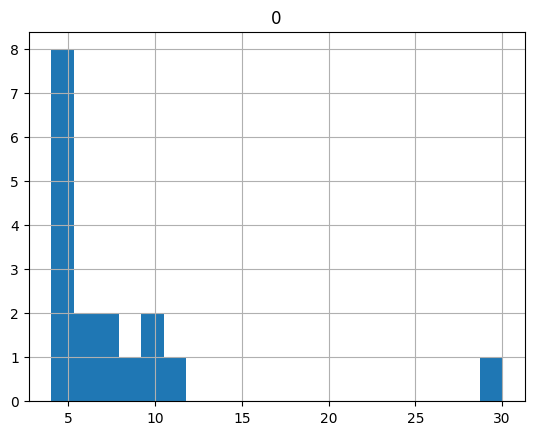

In [ ]:
week_miles_df.hist(bins=20)

In [ ]:
### Calculating the measures of central tendency via st.mean, st.mode, and st.median.
### We can use these functions directly on the list
print(f"The mean is: {st.mean(week_miles)}")
print(f"The median is: {st.median(week_miles)}")
print(f"The mode is: {st.mode(week_miles)}")


The mean is: 7.705882352941177
The median is: 6
The mode is: 4


In [ ]:
### Calculating the measures of central tendency via .mean(), .median(), and .mode()
### We have to first convert the list to a dataframe
print(f"The mean is: {week_miles_df.mean().values[0]}")
print(f"The median is: {week_miles_df.median().values[0]}")
print(f"The mode is: {week_miles_df.mode().values[0]}")

The mean is: 7.705882352941177
The median is: 6.0
The mode is: [4]


**Conclusion for Question #1 :**

Median best describes this data set due to the outlier value of 30 increases the mean drastically.


## **Question #2 : Choose the best measure to describe the below plot**

We are working with a dataset that contains the funds raised by each of the 10 members of the cheerleading team for a local charity (in dollars).

array([[<Axes: title={'center': '0'}>]], dtype=object)

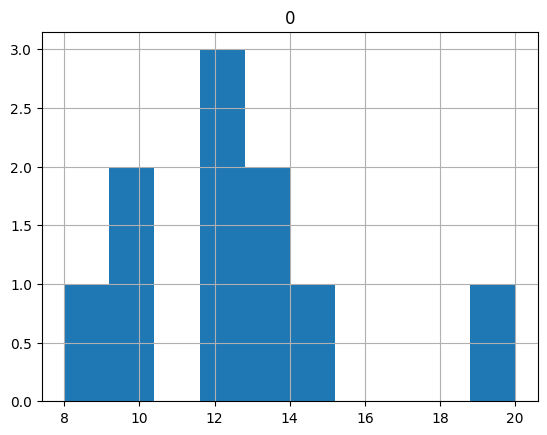

In [ ]:
###Turn the list below into a dataframe first using pd.DataFrame()
###Plot the dataframe using hist()

dollars_raised = [8, 10, 10, 12, 12, 12, 13, 13, 15, 20]
df_dollars = pd.DataFrame(dollars_raised)
df_dollars.hist()

In [ ]:
### Calculate the mean, median, and the mode.
### What do the values of these measures tell us about this distribution?
print("mean ",df_dollars.mean().values[0])
print("median", df_dollars.median().values[0])
print("mode", df_dollars.mode().values[0])


mean  12.5
median 12.0
mode [12]


**Conclusion for Question #2 :**

Conclusion: The similarity in the mean, median and mode signals that the dataset is not skewed.

## **Question #3 : Cars dataset**

1. Calculate the average price of all SUV cars.
2. Calculate the average price of SUV models from the Ford manufacturer.
3. Calculate the average price of SUV models from all manufacturers except Ford.

Compare the results of the above and share your findings.

**Hint:** Task is to understand whether removing Ford from the main dataset influences the average price of the SUV models in general

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Make      10000 non-null  object 
 1   Model     10000 non-null  object 
 2   Year      10000 non-null  int64  
 3   Variant   10000 non-null  object 
 4   Kms       10000 non-null  int64  
 5   Price     10000 non-null  int64  
 6   Doors     10000 non-null  float64
 7   Kind      10000 non-null  object 
 8   Location  10000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 703.3+ KB


In [ ]:
### Question 3.1 Calculate the average price of all SUV cars.

suv_mean = cars.query("Kind == 'SUV'")['Price'].mean().round()
print(suv_mean)




380708.0


In [ ]:
#Question 3.2 Calculate the average price of SUV models from the FORD manufacture
suv = cars.query("Kind == 'SUV'")
ford_mean = suv.groupby("Make")["Price"].mean().round()["Ford"]
print(ford_mean)

335166.0


In [ ]:
# Question 3.3 Calculate the average price of SUV models from all manufacturers except Ford.
suv = cars.query("Kind == 'SUV'")
suv.loc[suv["Make"] != "Ford",["Price"]].mean().round()


,0
Price,545920.0


**Conclusion for Question #3 :**

Conclusion: Removing Ford does affect the average price because Ford is about 40% of the whole data set.

## **Question #4 : Identify the price trend of the Hatchback model car in the cars dataset.**



**Pseudocode:**

1) Filter the dataframe to include only the Hatchback car model (use column "Kind").

2) Calculate the mean and the median of the Price column based on this filtered dataset.


3) Group by year and use different measures of central tendency on columns Price. (eg. mean, median)

4) Create a barplot to see how the price of the Hatchback has evolved over the years.

In [ ]:
### Question 4.1
### Filter the dataframe to include only the Hatchback car model.
hatch = cars.query("Kind == 'Hatchback'")
hatch



,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location
2,Volkswagen,Fox,2011,1.6 Trendline,132000,209980,5.0,Hatchback,Bs.as. G.b.a. Sur
4,Volkswagen,Gol,2013,1.4 Power 83cv 3 p,107000,146000,3.0,Hatchback,Córdoba
6,Ford,Ka,2012,1.0 Fly Viral 63cv,95243,142000,3.0,Hatchback,Bs.as. G.b.a. Sur
7,Ford,Ka,2012,1.6 Fly Viral 95cv,110000,148000,3.0,Hatchback,Buenos Aires Interior
8,Ford,Focus III,2017,1.6 S,17500,367000,5.0,Hatchback,Buenos Aires Interior
...,...,...,...,...,...,...,...,...,...
9994,Ford,Focus III,2016,2.0 Se,18000,370000,5.0,Hatchback,Capital Federal
9995,Ford,Focus III,2016,2.0 Se,67000,399000,5.0,Hatchback,Bs.as. G.b.a. Oeste
9997,Ford,Fiesta Kinetic Design,2012,1.6 Design 120cv Titanium,89000,250000,5.0,Hatchback,Tucumán
9998,Ford,Fiesta Kinetic Design,2013,1.6 Design 120cv Titanium,76000,295000,5.0,Hatchback,Buenos Aires Interior


In [ ]:
### Question 4.2
### Calculate the mean and the median across the dataset that contains only Hatchback cars
### Use mean() and median()
hatch = cars.query("Kind == 'Hatchback'")["Price"]
hatch.agg(["mean","max"]).round(2)


,Price
mean,276554.83
max,1170000.00


In [ ]:
### Question 4.3
### Use the different measures of central tendency to understand how the yearly price has evolved over years.
### Group by year and use mean() and median() on the Price column.
hatch = cars.query("Kind == 'Hatchback'")[["Year","Price"]]
hatch.groupby("Year")["Price"].agg(["mean","median"]).round(2)

,mean,median
Year,,
2011,195320.51,190000.0
2012,207276.11,195000.0
2013,231396.88,220000.0
2014,299797.16,290499.5
2015,348179.24,340000.0
2016,405378.73,375000.0
2017,436084.48,390000.0
2018,550299.57,485000.0


<Axes: xlabel='Year'>

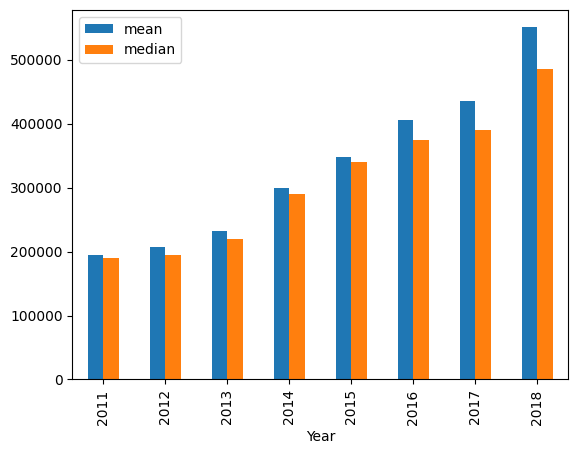

In [ ]:
### Question 4.3
### Use a barplot to to show the trend in price.
### Use plt.bar()
hatch = cars.query("Kind == 'Hatchback'")[["Year","Price"]]
hatch.groupby("Year")["Price"].agg(["mean","median"]).round(2).plot.bar()



**Conclusion for Question #4 :**

Conclusion: Prices for Hatchback cars have been on an increasing trend from 2011 to 2018

# **2. Measures of Spread**

## **Question #5 : Calculate the measure of spread for the below cases and write down your findings about how the data is spread.**

1. We will use the dataframe df1 = [2, 41, 45, 14, 67, 7, 8, 9, 17].
2. We will explore the price of the cars manufactured by Mercedes Benz before 2015.
3. We will explore the mileage (Kms) on the cars of kind 'Sedán' and 'Pick-Up'.


In [ ]:
### Question 5.1:
### Use this small dataset to calculate the range and the standard deviation.
df1 = [2,41,45,14,67,7,8,9,17]





NameError: name 'df' is not defined

In [ ]:
df1_range = max(df1) - min(df1)

print(df1_range)
print(st.stdev(df1))

65
22.299103120977758


In [ ]:
### Question 5.2
### Filter the cars dataframe for 'Mercedes Benz' car make that were produced before 2015.
### Calculate the range and the standard deviation.


In [ ]:
### Question 5.3
### Create two dataframes: one containing 'Sedán' cars and one containing 'Pick-Up' cars.
### Calculate the range and the standard deviation of the mileage (Kms column) for each car type separately.
### Compare the ranges and standard deviations of the two types of cars. Which one is higher?



**Concusion for Questions #5:**

Write your conclusions here.

# **3. Correlation**



## Question #6

Think about the columns in the cars dataset. What numerical columns can be correlated with each other?

Now check your assumptions using the formulas from the lecture, checking the correlation coefficients and plotting a heatmap.

Share your analysis and conclusions.  






In [ ]:
### Decide for which columns in this dataset you would like to calculate the correlation coefficient.
### Calculate the correlation coefficient by using .corr()
### Example df[['A', 'B', 'C']].corr(), with A, B, and C being column names.
### Save these coefficients in a dataframe called cars_corr.


<Axes: >

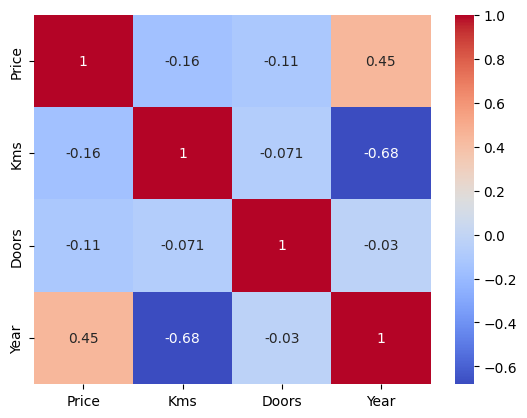

In [ ]:
### Plot a heatmap based on the cars_cor datatframe you created above by using vizualization library Seaborn.
### Make sure you save the dataframe with correlations as cars_cor, otherwise the code below won't work.

sns.heatmap(data = cars_corr, annot = True, cmap = 'coolwarm')

**Conclusion for Question #6 :**

Write your conclusions here.

